In [11]:
# Imports
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import regexp_tokenize, TweetTokenizer
import matplotlib.pyplot as plt

##########################################

# Loading data

# my_string
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"


# scene_one
with open("assets/grail.txt") as file:
    lines = file.readlines()[:40]
    scene_one = ''.join(lines)

# tweets:
tweets = ['This is the best #nlp exercise ive found online! #python', '#NLP is super fun! <3 #learning', 'Thanks @datacamp :) #nlp #python']

# german_text
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

# holy_grail
with open("assets/grail.txt") as file:
    holy_grail = file.read()

In [2]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))


["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [3]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'course', 'could', 'creeper', 'south', 'Wait', 'Pendragon', 'that', 'interested', 'Supposing', 'five', '--', 'master', 'court', 'breadth', "'em", "'m", 'swallow', 'pound', 'wants', 'knights', 'son', 'to', 'if', "'d", 'through', 'temperate', 'horse', 'plover', 'weight', 'then', 'sovereign', 'just', 'under', 'air-speed', 'A', 'clop', 'coconut', 'Pull', 'do', 'maintain', 'Britons', 'Are', 'land', 'Please', 'Halt', '#', 'its', 'point', 'swallows', 'line', 'SCENE', '...', '[', "'", '!', 'my', 'Whoa', 'goes', 'It', 'get', 'held', 'beat', 'So', 'at', 'Arthur', 'Where', 'Listen', 'bring', 'have', 'Camelot', 'carry', 'King', 'order', 'husk', 'What', 'speak', 'other', "'ve", 'be', 'he', 'two', 'grip', 'tell', 'from', 'kingdom', 'seek', 'Well', 'anyway', 'there', 'minute', 'is', '1', 'The', 'them', 'every', 'strand', 'carried', 'We', "n't", 'times', '.', 'together', 'must', 'trusty', 'use', 'all', 'strangers', 'right', 'question', 'may', 'feathers', 'non-migratory', 'SOLDIER', 'will', 'castle', 

In [4]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search(r"coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [5]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [6]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


In [7]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [8]:
# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([#@]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [9]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [10]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capitalized words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


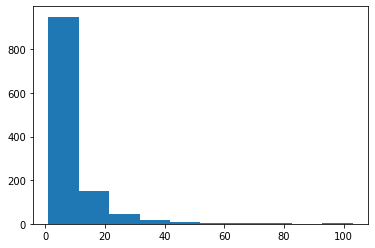

In [13]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()